In [9]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [10]:
#Prep the notebook
#import necessary sources 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, make_confusion_matrix, compare_historys
from sklearn.metrics import accuracy_score


walk_through_dir("black_garlic_50_test")

train_dir = "black_garlic_50_test/train/"
test_dir = "black_garlic_50_test/test/"

# Create data inputs
IMG_SIZE = (224, 224) 
train_data_50_test = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", 
                                                                            batch_size=32) 
test_data_50_test = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           shuffle=False)
val_data_50_test = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           shuffle=True)


There are 2 directories and 0 images in 'black_garlic_50_test'.
There are 3 directories and 0 images in 'black_garlic_50_test/test'.
There are 0 directories and 47 images in 'black_garlic_50_test/test/excellent'.
There are 0 directories and 47 images in 'black_garlic_50_test/test/overaged'.
There are 0 directories and 47 images in 'black_garlic_50_test/test/underaged'.
There are 3 directories and 0 images in 'black_garlic_50_test/train'.
There are 0 directories and 408 images in 'black_garlic_50_test/train/excellent'.
There are 0 directories and 408 images in 'black_garlic_50_test/train/overaged'.
There are 0 directories and 408 images in 'black_garlic_50_test/train/underaged'.
Found 1224 files belonging to 3 classes.
Found 141 files belonging to 3 classes.
Found 141 files belonging to 3 classes.


In [11]:
len(train_data_50_test), len(test_data_50_test)

(39, 5)

In [12]:

#Script to generate important details and figures
def generate_details(model,test_data,history):
    loaded_loss, loaded_accuracy = model.evaluate(test_data)
    loaded_loss, loaded_accuracy
    

    pred_probs = model.predict(test_data, verbose=1) # set verbosity to see how long it will take
    pred_classes = pred_probs.argmax(axis=1)
    pred_classes[:10]
    y_labels = []
    for images, labels in test_data.unbatch(): 
      y_labels.append(labels.numpy().argmax())
    y_labels[:10] 
    
    sklearn_accuracy = accuracy_score(y_labels, pred_classes)
    sklearn_accuracy
    print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")
    
    class_names = test_data.class_names
    class_names[:10]
    
    plot_loss_curves(history,figsize=(6, 3))
    make_confusion_matrix(y_true=y_labels,
                          y_pred=pred_classes,
                          classes=class_names,
                          figsize=(5, 5),
                          text_size=10,
                          norm=True,#with percentage
                          savefig=True)

In [13]:
def plot_loss_curves(history,figsize=(8, 8)):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.figure(figsize=figsize)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure(figsize=figsize)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [14]:
# Setup checkpoint path

def setup_checkpoint(model_name):
    checkpoint_path = "checkpoints/"+model_name+".ckpt" 
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                             save_weights_only=True,
                                                             save_best_only=True,
                                                             save_freq="epoch", 
                                                             verbose=1)
    return checkpoint_callback

In [15]:
# Model 1 EfficientNetB0

In [16]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history1 = model_1.fit(train_data_50_test,
                       epochs=10,
                       steps_per_epoch=len(train_data_50_test),
                       validation_data=val_data_50_test,
                       validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 1/10
39/39 [==============================] - 23s 497ms/step - loss: 0.9175 - accuracy: 0.5842 - val_loss: 0.5799 - val_accuracy: 0.8906
Epoch 2/10
39/39 [==============================] - 20s 495ms/step - loss: 0.5303 - accuracy: 0.8856 - val_loss: 0.3638 - val_accuracy: 0.9688
Epoch 3/10
39/39 [==============================] - 20s 485ms/step - loss: 0.3779 - accuracy: 0.9273 - val_loss: 0.2835 - val_accuracy: 0.9375
Epoch 4/10
39/39 [==============================] - 20s 477ms/step - loss: 0.2943 - accuracy: 0.9534 - val_loss: 0.2125 - val_accuracy: 0.9688
Epoch 5/10
39/39 [==============================] - 19s 472ms/step - loss: 0.2424 - accuracy: 0.9559 - val_loss: 0.1764 - val_accuracy: 1.0000
Epoch 6/10
39/39 [==============================] - 19s 473ms/step - loss: 0.2126 - accuracy: 0.9649 - val_loss: 0.1701 - val_accuracy: 0.9844
Epoch 7/10
39/39 [==============================] - 20s 482ms/step - loss: 0.1923 - accuracy: 0.9608 - val_loss: 0.1428 - val_accuracy: 0.9844

5/5 [==============================] - 3s 396ms/step
Close? True | Difference: -1.817730299613629e-08


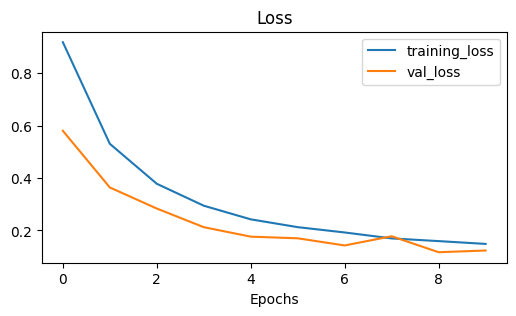

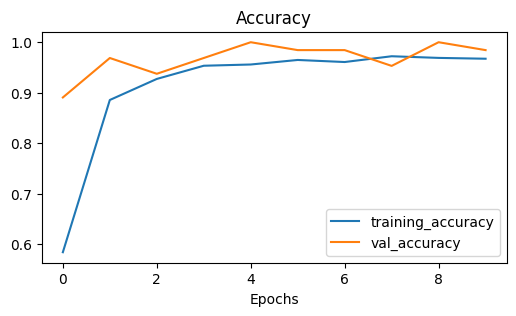

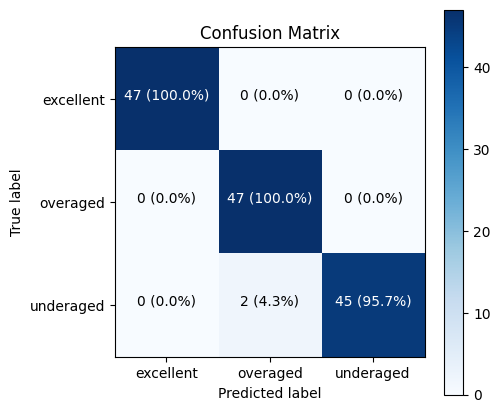

In [17]:
#Generate needed details
generate_details(model_1,test_data_50_test,history1)

In [18]:
#Model 1 EfficientNetB0 with fine-tuning

In [19]:
model_1_base_model = model_1.layers[1]
model_1_base_model.trainable = True
for layer in model_1_base_model.layers[:-10]:
  layer.trainable = False
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #set lower training rate
              metrics=["accuracy"])
initial_epochs = 10
fine_tune_epochs = initial_epochs + 10

history1_tuned = model_1.fit(train_data_50_test,
                             epochs=fine_tune_epochs,
                             steps_per_epoch=len(train_data_50_test),
                             validation_data=val_data_50_test,
                             initial_epoch=history1.epoch[-1], # start from previous last epoch
                             validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 10/20
39/39 [==============================] - 25s 523ms/step - loss: 0.1609 - accuracy: 0.9632 - val_loss: 0.1288 - val_accuracy: 0.9688
Epoch 11/20
39/39 [==============================] - 21s 511ms/step - loss: 0.1146 - accuracy: 0.9706 - val_loss: 0.0609 - val_accuracy: 1.0000
Epoch 12/20
39/39 [==============================] - 21s 505ms/step - loss: 0.0940 - accuracy: 0.9779 - val_loss: 0.0400 - val_accuracy: 1.0000
Epoch 13/20
39/39 [==============================] - 21s 507ms/step - loss: 0.0826 - accuracy: 0.9739 - val_loss: 0.0502 - val_accuracy: 0.9844
Epoch 14/20
39/39 [==============================] - 21s 505ms/step - loss: 0.0698 - accuracy: 0.9828 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 15/20
39/39 [==============================] - 21s 503ms/step - loss: 0.0660 - accuracy: 0.9886 - val_loss: 0.0418 - val_accuracy: 1.0000
Epoch 16/20
39/39 [==============================] - 20s 499ms/step - loss: 0.0553 - accuracy: 0.9845 - val_loss: 0.0587 - val_accuracy:

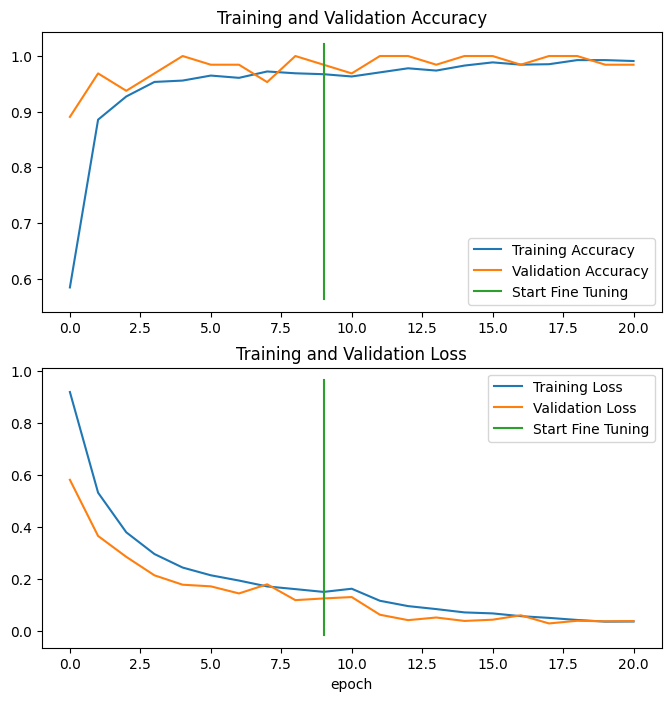

In [20]:
compare_historys(original_history=history1,
                 new_history=history1_tuned,
                 initial_epochs=10)

5/5 [==============================] - 3s 378ms/step
Close? True | Difference: 2.0713670889627167e-08


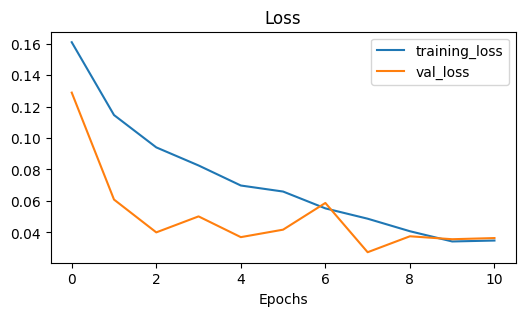

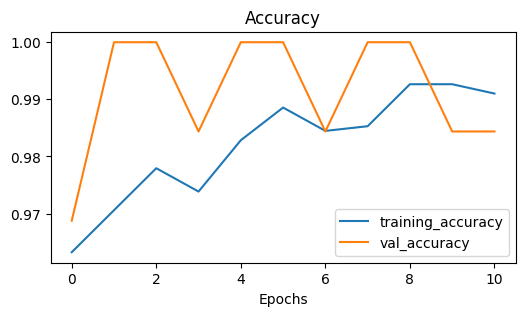

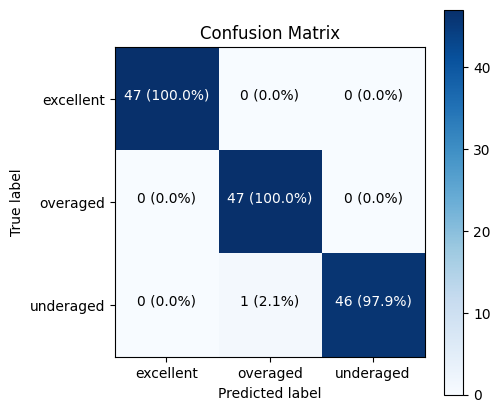

In [21]:
#Generate needed details
generate_details(model_1,test_data_50_test,history1_tuned)

In [22]:
# Model 2 EfficientNetB0 with augmentation

In [23]:
data_augmentation = keras.Sequential([
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(3, activation="softmax", name="output_layer")(x)
model_2 = keras.Model(inputs, outputs)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history2 = model_2.fit(train_data_50_test,
                    epochs=10,
                    steps_per_epoch=len(train_data_50_test),
                    validation_data=val_data_50_test,
                    validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 1/10
39/39 [==============================] - 23s 485ms/step - loss: 0.8484 - accuracy: 0.6373 - val_loss: 0.5431 - val_accuracy: 0.8750
Epoch 2/10
39/39 [==============================] - 19s 461ms/step - loss: 0.4941 - accuracy: 0.8815 - val_loss: 0.3913 - val_accuracy: 0.8750
Epoch 3/10
39/39 [==============================] - 20s 482ms/step - loss: 0.3759 - accuracy: 0.9265 - val_loss: 0.3378 - val_accuracy: 0.9219
Epoch 4/10
39/39 [==============================] - 19s 467ms/step - loss: 0.2931 - accuracy: 0.9281 - val_loss: 0.2231 - val_accuracy: 0.9531
Epoch 5/10
39/39 [==============================] - 19s 463ms/step - loss: 0.2491 - accuracy: 0.9477 - val_loss: 0.2324 - val_accuracy: 0.9688
Epoch 6/10
39/39 [==============================] - 20s 478ms/step - loss: 0.2150 - accuracy: 0.9608 - val_loss: 0.1750 - val_accuracy: 0.9531
Epoch 7/10
39/39 [==============================] - 19s 452ms/step - loss: 0.1992 - accuracy: 0.9526 - val_loss: 0.1680 - val_accuracy: 0.9531

5/5 [==============================] - 3s 363ms/step
Close? True | Difference: 7.609103569450326e-09


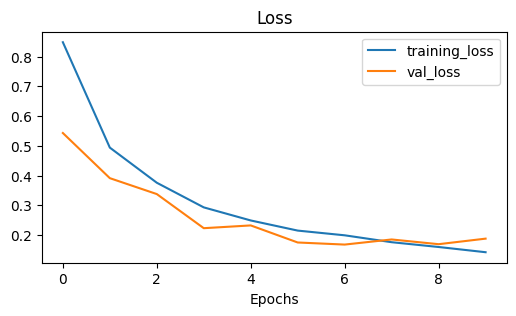

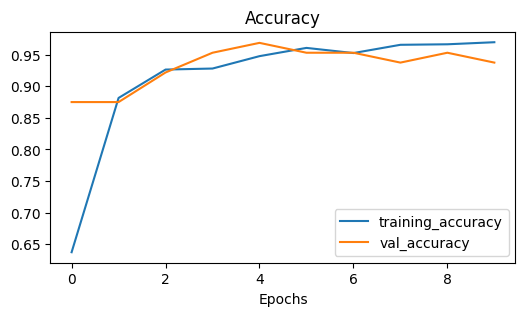

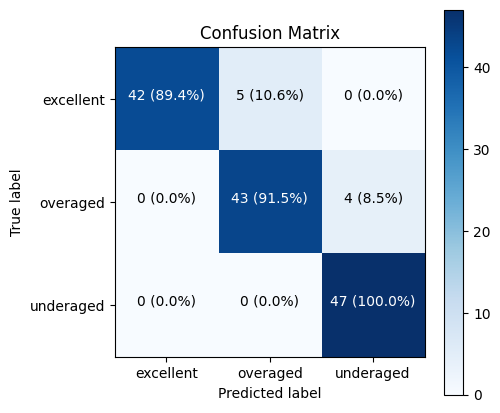

In [24]:
#Generate needed details
generate_details(model_2,test_data_50_test,history2)

In [25]:
# Model 2 EfficientNetB0 with augmentation and fine-tuning

In [26]:
model_2_base_model = model_2.layers[2]
model_2_base_model.trainable = True
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #set lower training rate
              metrics=["accuracy"])
initial_epochs = 10
fine_tune_epochs = initial_epochs + 10

history2_tuned = model_2.fit(train_data_50_test,
                                 epochs=fine_tune_epochs,
                                 steps_per_epoch=len(train_data_50_test),
                                 validation_data=val_data_50_test,
                                 initial_epoch=history2.epoch[-1], 
                                 validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 10/20
39/39 [==============================] - 23s 484ms/step - loss: 0.1159 - accuracy: 0.9706 - val_loss: 0.1494 - val_accuracy: 0.9375
Epoch 11/20
39/39 [==============================] - 20s 493ms/step - loss: 0.0888 - accuracy: 0.9739 - val_loss: 0.2164 - val_accuracy: 0.9219
Epoch 12/20
39/39 [==============================] - 19s 470ms/step - loss: 0.0769 - accuracy: 0.9812 - val_loss: 0.1223 - val_accuracy: 0.9531
Epoch 13/20
39/39 [==============================] - 19s 454ms/step - loss: 0.0706 - accuracy: 0.9747 - val_loss: 0.1777 - val_accuracy: 0.9375
Epoch 14/20
39/39 [==============================] - 19s 478ms/step - loss: 0.0560 - accuracy: 0.9796 - val_loss: 0.1030 - val_accuracy: 0.9531
Epoch 15/20
39/39 [==============================] - 20s 488ms/step - loss: 0.0499 - accuracy: 0.9869 - val_loss: 0.0716 - val_accuracy: 0.9688
Epoch 16/20
39/39 [==============================] - 19s 481ms/step - loss: 0.0526 - accuracy: 0.9796 - val_loss: 0.1660 - val_accuracy:

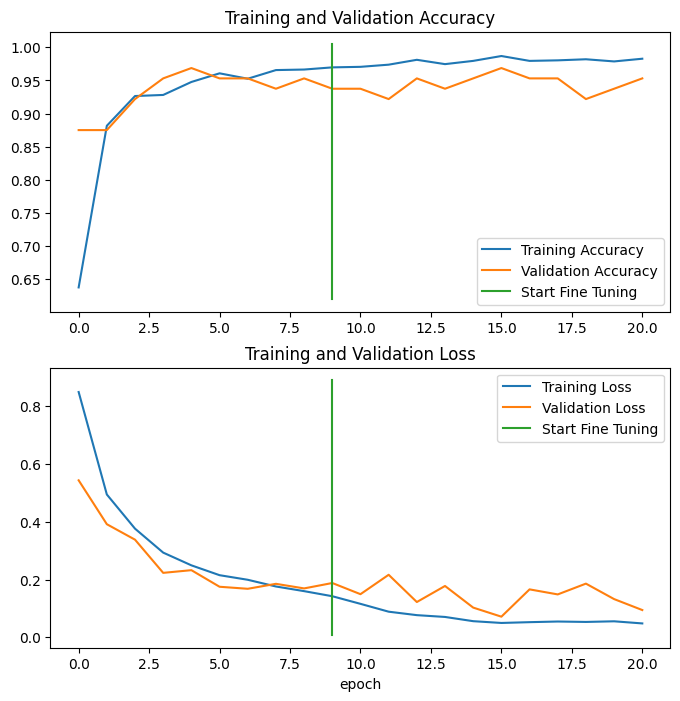

In [27]:
compare_historys(original_history=history2,
                 new_history=history2_tuned,
                 initial_epochs=10)

In [28]:
# Model 3 ResNet50v2

In [29]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
model_3 = tf.keras.Model(inputs, outputs)
model_3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history3 = model_3.fit(train_data_50_test,
                       epochs=10,
                       steps_per_epoch=len(train_data_50_test),
                       validation_data=val_data_50_test,
                       validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 1/10
39/39 [==============================] - 28s 650ms/step - loss: 48.8172 - accuracy: 0.3276 - val_loss: 6.1727 - val_accuracy: 0.3125
Epoch 2/10
39/39 [==============================] - 26s 647ms/step - loss: 38.2839 - accuracy: 0.3529 - val_loss: 15.3651 - val_accuracy: 0.4375
Epoch 3/10
39/39 [==============================] - 26s 634ms/step - loss: 29.8090 - accuracy: 0.3783 - val_loss: 22.8490 - val_accuracy: 0.3438
Epoch 4/10
39/39 [==============================] - 26s 642ms/step - loss: 24.6882 - accuracy: 0.3905 - val_loss: 16.1710 - val_accuracy: 0.4375
Epoch 5/10
39/39 [==============================] - 26s 646ms/step - loss: 19.3278 - accuracy: 0.4167 - val_loss: 0.8619 - val_accuracy: 0.8125
Epoch 6/10
39/39 [==============================] - 26s 642ms/step - loss: 13.2956 - accuracy: 0.4788 - val_loss: 6.0293 - val_accuracy: 0.5625
Epoch 7/10
39/39 [==============================] - 26s 639ms/step - loss: 15.8003 - accuracy: 0.4518 - val_loss: 2.8033 - val_accura

5/5 [==============================] - 3s 494ms/step
Close? True | Difference: 2.282731081937328e-08


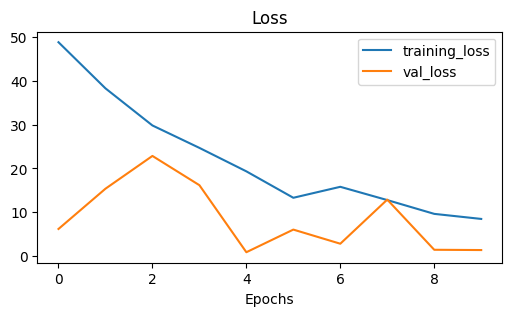

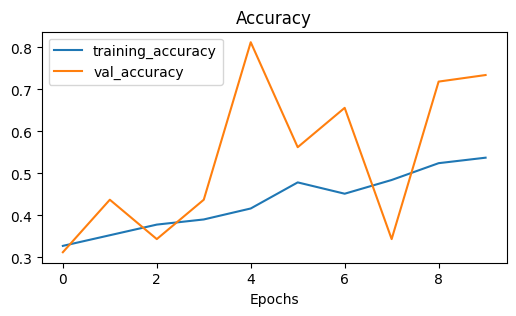

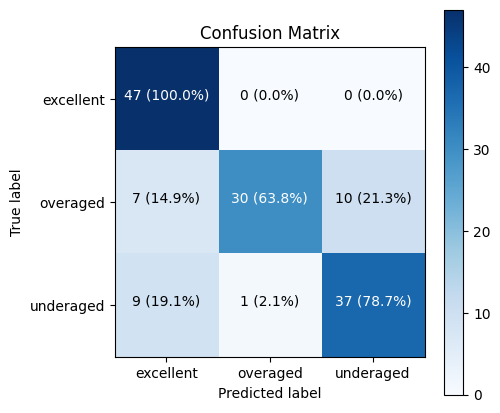

In [30]:
#Generate needed details
generate_details(model_3,test_data_50_test,history3)

In [31]:
# Model 3 ResNet50v2 with fine-tuning

In [32]:
# 1. Access the base model to fine tune
model_3_base_model = model_3.layers[1]
model_3_base_model.trainable = True
for layer in model_3_base_model.layers[:-10]:
  layer.trainable = False
model_3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #set lower training rate 0.001 is default
              metrics=["accuracy"])
initial_epochs = 10
fine_tune_epochs = initial_epochs + 10
history3_tuned = model_3.fit(train_data_50_test,
                                 epochs=fine_tune_epochs,
                                 steps_per_epoch=len(train_data_50_test),
                                 validation_data=val_data_50_test,
                                 initial_epoch=history3.epoch[-1], 
                                 validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 10/20
39/39 [==============================] - 32s 760ms/step - loss: 1.0629 - accuracy: 0.4395 - val_loss: 1.0942 - val_accuracy: 0.5000
Epoch 11/20
39/39 [==============================] - 29s 732ms/step - loss: 0.9837 - accuracy: 0.5498 - val_loss: 1.0374 - val_accuracy: 0.5000
Epoch 12/20
39/39 [==============================] - 30s 736ms/step - loss: 0.8955 - accuracy: 0.6560 - val_loss: 1.0051 - val_accuracy: 0.5938
Epoch 13/20
39/39 [==============================] - 29s 733ms/step - loss: 0.7332 - accuracy: 0.7533 - val_loss: 0.9657 - val_accuracy: 0.5156
Epoch 14/20
39/39 [==============================] - 29s 731ms/step - loss: 0.5730 - accuracy: 0.8023 - val_loss: 0.8416 - val_accuracy: 0.6250
Epoch 15/20
39/39 [==============================] - 30s 739ms/step - loss: 0.4578 - accuracy: 0.8472 - val_loss: 0.7068 - val_accuracy: 0.7500
Epoch 16/20
39/39 [==============================] - 30s 755ms/step - loss: 0.4067 - accuracy: 0.8529 - val_loss: 0.5802 - val_accuracy:

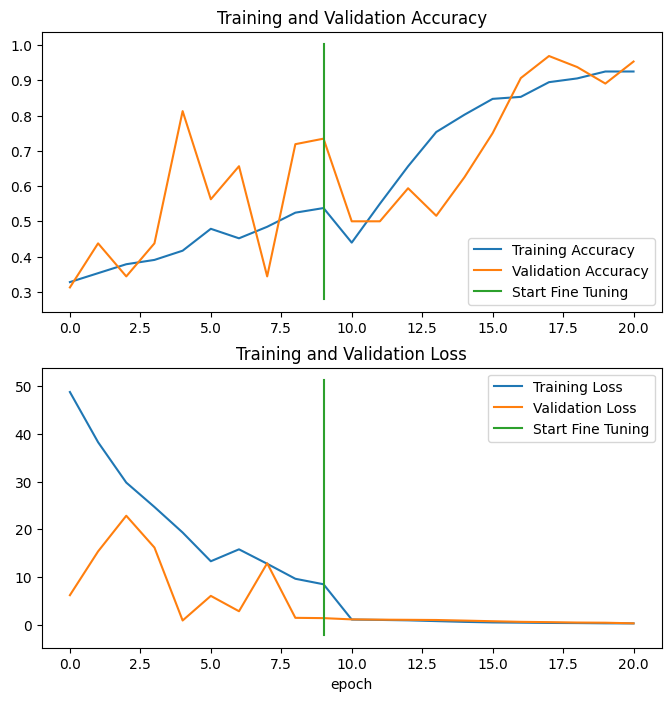

In [33]:
compare_historys(original_history=history3,
                 new_history=history3_tuned,
                 initial_epochs=10)

In [34]:
# Model 4 ResNet50v2 with augmentation

In [35]:
data_augmentation = keras.Sequential([
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.Rescaling(1./255) 
], name ="data_augmentation")

input_shape = (224, 224, 3)
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(3, activation="softmax", name="output_layer")(x)
model_4 = keras.Model(inputs, outputs)
model_4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history4 = model_4.fit(train_data_50_test,
                    epochs=10,
                    steps_per_epoch=len(train_data_50_test),
                    validation_data=val_data_50_test,
                    validation_steps=int(0.5 * len(test_data_50_test)))

Epoch 1/10
39/39 [==============================] - 29s 683ms/step - loss: 1.0851 - accuracy: 0.5123 - val_loss: 0.7192 - val_accuracy: 0.6250
Epoch 2/10
39/39 [==============================] - 28s 684ms/step - loss: 0.6691 - accuracy: 0.7198 - val_loss: 0.6070 - val_accuracy: 0.7656
Epoch 3/10
39/39 [==============================] - 27s 679ms/step - loss: 0.5913 - accuracy: 0.7590 - val_loss: 0.4276 - val_accuracy: 0.8438
Epoch 4/10
39/39 [==============================] - 28s 705ms/step - loss: 0.4718 - accuracy: 0.8088 - val_loss: 0.3453 - val_accuracy: 0.8906
Epoch 5/10
39/39 [==============================] - 26s 645ms/step - loss: 0.4675 - accuracy: 0.8105 - val_loss: 0.4190 - val_accuracy: 0.8438
Epoch 6/10
39/39 [==============================] - 27s 659ms/step - loss: 0.4282 - accuracy: 0.8350 - val_loss: 0.3145 - val_accuracy: 0.8906
Epoch 7/10
39/39 [==============================] - 27s 669ms/step - loss: 0.3641 - accuracy: 0.8554 - val_loss: 0.2813 - val_accuracy: 0.9062

5/5 [==============================] - 3s 492ms/step
Close? True | Difference: -1.8600030959881053e-08


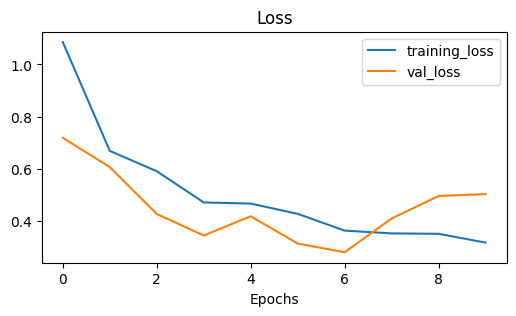

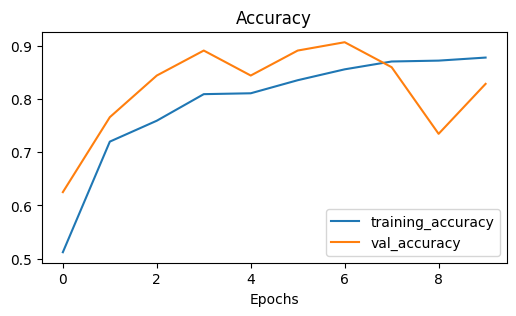

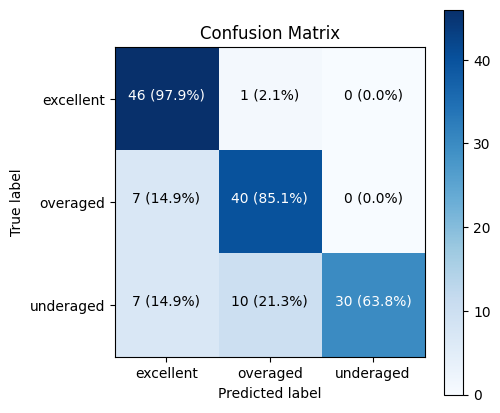

In [36]:
#Generate needed details
generate_details(model_4,test_data_50_test,history4)

In [37]:
# Model 4 ResNet50v2 with augmentation and fine-tuning

In [38]:
model_4_base_model = model_4.layers[2]
model_4_base_model.trainable = True
for layer in model_4_base_model.layers[:-10]:
  layer.trainable = False
model_4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #set lower training rate
              metrics=["accuracy"])
initial_epochs = 10
fine_tune_epochs = initial_epochs + 10
history4_tuned = model_4.fit(train_data_50_test,
                                 epochs=fine_tune_epochs,
                                 steps_per_epoch=len(train_data_50_test),
                                 validation_data=val_data_50_test,
                                 initial_epoch=history4.epoch[-1],
                                 validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 10/20
39/39 [==============================] - 33s 771ms/step - loss: 0.3973 - accuracy: 0.8521 - val_loss: 0.5449 - val_accuracy: 0.7969
Epoch 11/20
39/39 [==============================] - 31s 768ms/step - loss: 0.2912 - accuracy: 0.8930 - val_loss: 0.4571 - val_accuracy: 0.8594
Epoch 12/20
39/39 [==============================] - 30s 761ms/step - loss: 0.2215 - accuracy: 0.9150 - val_loss: 0.5337 - val_accuracy: 0.8281
Epoch 13/20
39/39 [==============================] - 31s 781ms/step - loss: 0.1532 - accuracy: 0.9477 - val_loss: 0.5656 - val_accuracy: 0.7969
Epoch 14/20
39/39 [==============================] - 32s 798ms/step - loss: 0.1526 - accuracy: 0.9444 - val_loss: 0.1912 - val_accuracy: 0.9219
Epoch 15/20
39/39 [==============================] - 31s 775ms/step - loss: 0.1745 - accuracy: 0.9314 - val_loss: 0.1957 - val_accuracy: 0.9062
Epoch 16/20
39/39 [==============================] - 31s 767ms/step - loss: 0.1208 - accuracy: 0.9551 - val_loss: 0.2730 - val_accuracy:

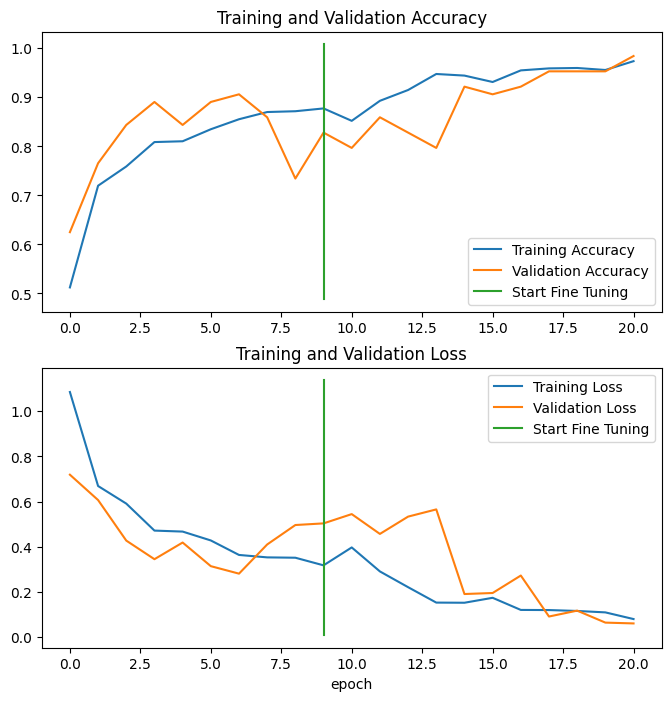

In [39]:
compare_historys(original_history=history4,
                 new_history=history4_tuned,
                 initial_epochs=10)

In [40]:
# Model 5 VGG16

In [41]:
base_model = tf.keras.applications.VGG16(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
model_5 = tf.keras.Model(inputs, outputs)
model_5.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history5 = model_5.fit(train_data_50_test,
                                 epochs=10,
                                 steps_per_epoch=len(train_data_50_test),
                                 validation_data=val_data_50_test,
                                 validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 1/10
39/39 [==============================] - 65s 2s/step - loss: 1.5108 - accuracy: 0.5106 - val_loss: 0.7341 - val_accuracy: 0.7031
Epoch 2/10
39/39 [==============================] - 66s 2s/step - loss: 0.6515 - accuracy: 0.7222 - val_loss: 0.5262 - val_accuracy: 0.7969
Epoch 3/10
39/39 [==============================] - 68s 2s/step - loss: 0.4532 - accuracy: 0.8056 - val_loss: 0.2899 - val_accuracy: 0.9062
Epoch 4/10
39/39 [==============================] - 64s 2s/step - loss: 0.3566 - accuracy: 0.8497 - val_loss: 0.3251 - val_accuracy: 0.8750
Epoch 5/10
39/39 [==============================] - 64s 2s/step - loss: 0.2964 - accuracy: 0.8889 - val_loss: 0.2601 - val_accuracy: 0.8906
Epoch 6/10
39/39 [==============================] - 65s 2s/step - loss: 0.2550 - accuracy: 0.9052 - val_loss: 0.2161 - val_accuracy: 0.9375
Epoch 7/10
39/39 [==============================] - 65s 2s/step - loss: 0.2276 - accuracy: 0.9175 - val_loss: 0.1876 - val_accuracy: 0.9219
Epoch 8/10
39/39 [==

5/5 [==============================] - 7s 1s/step
Close? True | Difference: 1.0145471462941202e-08


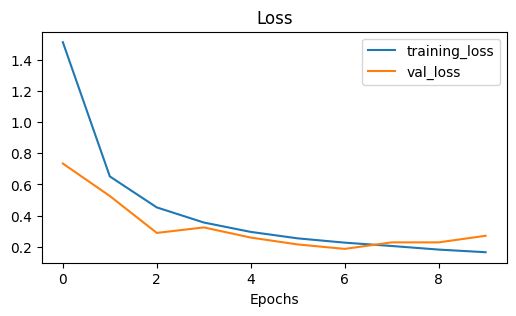

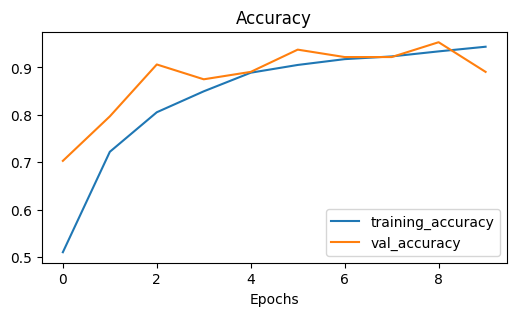

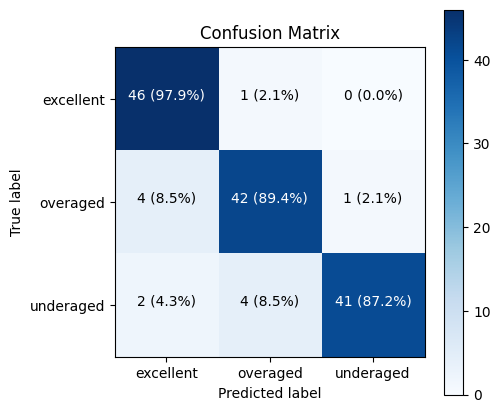

In [42]:
#Generate needed details
generate_details(model_5,test_data_50_test,history5)

In [43]:
# Model 5 VGG16 with fine-tuning

In [44]:
model_5_base_model = model_5.layers[1]
model_5_base_model.trainable = True
for layer in model_5_base_model.layers[:-10]:
  layer.trainable = False
model_5.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #set lower training rate 0.001 is default
              metrics=["accuracy"])
initial_epochs = 10
fine_tune_epochs = initial_epochs + 10

history5_tuned = model_5.fit(train_data_50_test,
                                 epochs=fine_tune_epochs,
                                 steps_per_epoch=len(train_data_50_test),
                                 validation_data=val_data_50_test,
                                 initial_epoch=history5.epoch[-1],
                                 validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 10/20
39/39 [==============================] - 128s 3s/step - loss: 0.7318 - accuracy: 0.8382 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 11/20
39/39 [==============================] - 126s 3s/step - loss: 0.1259 - accuracy: 0.9526 - val_loss: 1.5617 - val_accuracy: 0.8750
Epoch 12/20
39/39 [==============================] - 126s 3s/step - loss: 0.0954 - accuracy: 0.9657 - val_loss: 0.0624 - val_accuracy: 0.9844
Epoch 13/20
39/39 [==============================] - 129s 3s/step - loss: 0.0439 - accuracy: 0.9853 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 14/20
39/39 [==============================] - 126s 3s/step - loss: 0.0428 - accuracy: 0.9845 - val_loss: 0.0770 - val_accuracy: 0.9688
Epoch 15/20
39/39 [==============================] - 127s 3s/step - loss: 0.0138 - accuracy: 0.9951 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 16/20
39/39 [==============================] - 126s 3s/step - loss: 0.0092 - accuracy: 0.9959 - val_loss: 0.0251 - val_accuracy: 0.9844
Epoch 

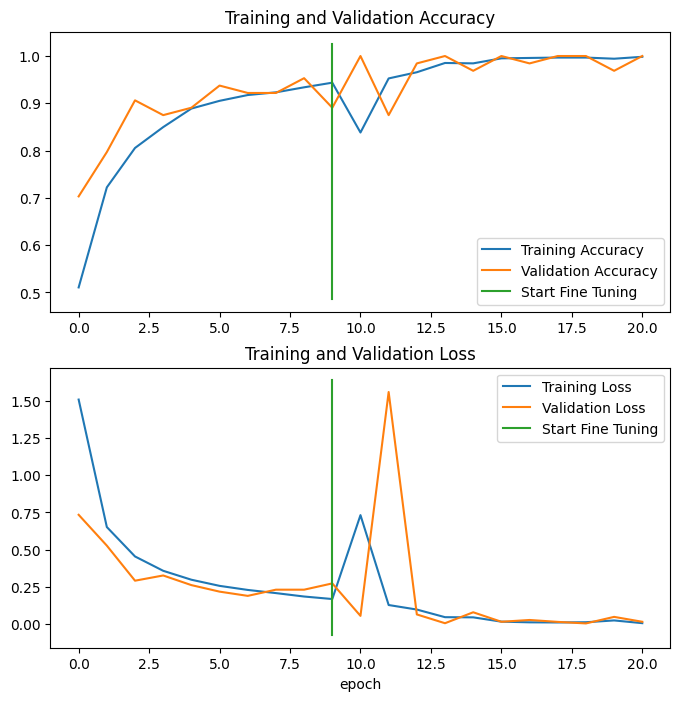

In [45]:
compare_historys(original_history=history5,
                 new_history=history5_tuned,
                 initial_epochs=10)

In [46]:
# Model 6 VGG16 with augmentation

In [47]:
data_augmentation = keras.Sequential([
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.Rescaling(1./255) 
], name ="data_augmentation")

input_shape = (224, 224, 3)
base_model = tf.keras.applications.VGG16(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(3, activation="softmax", name="output_layer")(x)
model_6 = keras.Model(inputs, outputs)
model_6.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=["accuracy"])
history6 = model_6.fit(train_data_50_test,
                                 epochs=10,
                                 steps_per_epoch=len(train_data_50_test),
                                 validation_data=val_data_50_test,
                                 validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 1/10
39/39 [==============================] - 63s 2s/step - loss: 1.0972 - accuracy: 0.3472 - val_loss: 1.0712 - val_accuracy: 0.6250
Epoch 2/10
39/39 [==============================] - 65s 2s/step - loss: 1.0763 - accuracy: 0.4322 - val_loss: 1.0636 - val_accuracy: 0.5469
Epoch 3/10
39/39 [==============================] - 64s 2s/step - loss: 1.0689 - accuracy: 0.4387 - val_loss: 1.0766 - val_accuracy: 0.3281
Epoch 4/10
39/39 [==============================] - 63s 2s/step - loss: 1.0567 - accuracy: 0.4706 - val_loss: 1.0358 - val_accuracy: 0.6562
Epoch 5/10
39/39 [==============================] - 63s 2s/step - loss: 1.0474 - accuracy: 0.5057 - val_loss: 1.0288 - val_accuracy: 0.6875
Epoch 6/10
39/39 [==============================] - 63s 2s/step - loss: 1.0333 - accuracy: 0.5253 - val_loss: 1.0202 - val_accuracy: 0.6094
Epoch 7/10
39/39 [==============================] - 63s 2s/step - loss: 1.0240 - accuracy: 0.5204 - val_loss: 0.9969 - val_accuracy: 0.6719
Epoch 8/10
39/39 [==

5/5 [==============================] - 7s 1s/step
Close? True | Difference: 4.227279748469925e-09


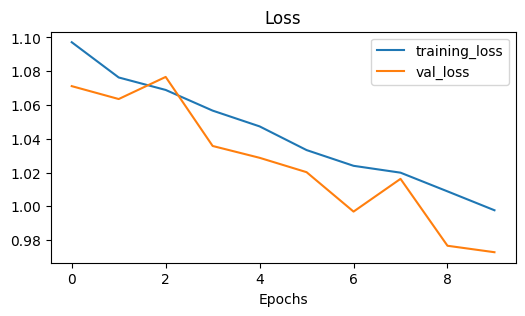

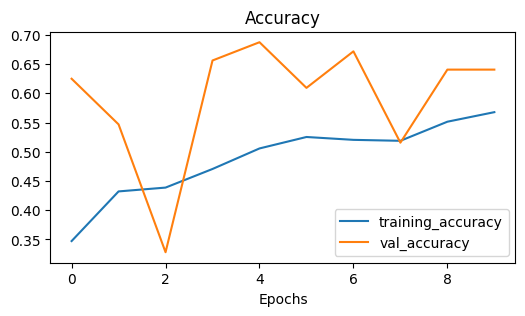

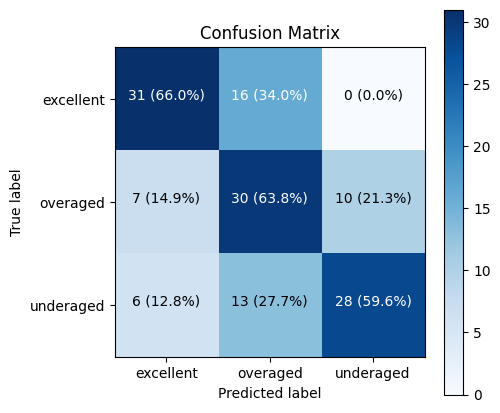

In [48]:
#Generate needed details
generate_details(model_6,test_data_50_test,history6)

In [49]:
# Model 6 VGG16 with augmentation and fine-tuning

In [50]:
model_6_base_model = model_6.layers[2]
model_6_base_model.trainable = True
for layer in model_6_base_model.layers[:-10]:
  layer.trainable = False
model_6.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #set lower training rate
              metrics=["accuracy"])
initial_epochs = 10
fine_tune_epochs = initial_epochs + 10
history6_tuned = model_6.fit(train_data_50_test,
                                 epochs=fine_tune_epochs,
                                 steps_per_epoch=len(train_data_50_test),
                                 validation_data=val_data_50_test,
                                 initial_epoch=history6.epoch[-1],
                                 validation_steps=int(0.5 * len(val_data_50_test)))

Epoch 10/20
39/39 [==============================] - 125s 3s/step - loss: 1.1084 - accuracy: 0.3987 - val_loss: 0.9163 - val_accuracy: 0.6250
Epoch 11/20
39/39 [==============================] - 125s 3s/step - loss: 0.8787 - accuracy: 0.5784 - val_loss: 1.3521 - val_accuracy: 0.5781
Epoch 12/20
39/39 [==============================] - 121s 3s/step - loss: 0.6842 - accuracy: 0.6797 - val_loss: 0.4799 - val_accuracy: 0.7812
Epoch 13/20
39/39 [==============================] - 117s 3s/step - loss: 0.2250 - accuracy: 0.9093 - val_loss: 1.8598 - val_accuracy: 0.6562
Epoch 14/20
39/39 [==============================] - 125s 3s/step - loss: 0.5929 - accuracy: 0.7990 - val_loss: 0.2030 - val_accuracy: 0.9375
Epoch 15/20
39/39 [==============================] - 124s 3s/step - loss: 0.1911 - accuracy: 0.9265 - val_loss: 0.1259 - val_accuracy: 0.9531
Epoch 16/20
39/39 [==============================] - 126s 3s/step - loss: 0.0983 - accuracy: 0.9649 - val_loss: 0.0977 - val_accuracy: 0.9688
Epoch 

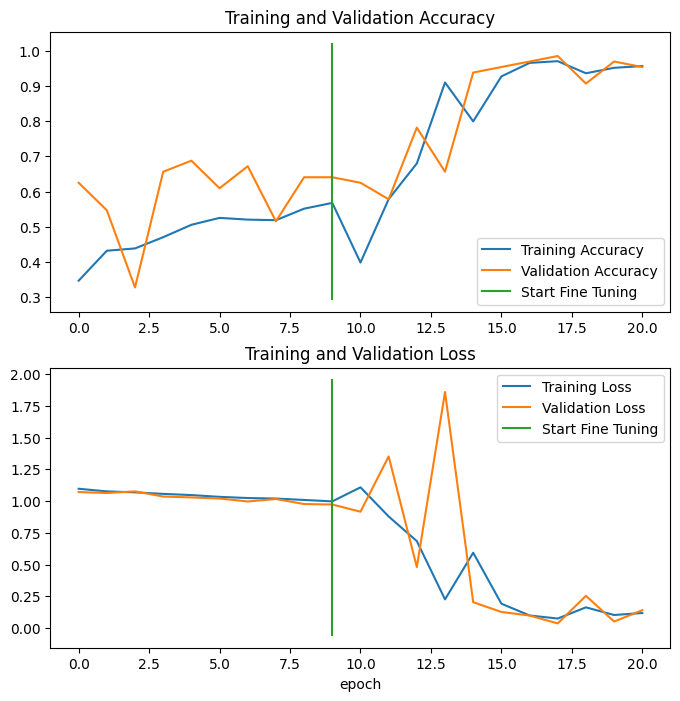

In [51]:
compare_historys(original_history=history6,
                 new_history=history6_tuned,
                 initial_epochs=10)